In [1]:
import torch
import torch.nn.functional as F
from lightning.pytorch import Trainer

from data import CatDogDataModule, MNISTDataModule
from model import VisionClassifier

from helper import show_image, show_worst_image_predictions, show_confusion_matrix, MyProgressBar

torch.set_float32_matmul_precision('medium')

/home/krm05476/anaconda3/envs/neural-network-course/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Step 1: We need to download an annotated dataset including images and classes and build a data module
#data_module = CatDogDataModule()
data_module = MNISTDataModule()

# Step 2: We use a pretrained vision model from torchvision
model = VisionClassifier(
    backbone="resnet18",
    num_classes=10,
)

# Step 3: Train Model
trainer = Trainer(max_epochs=1, callbacks=[MyProgressBar()])
trainer.fit(model, data_module)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name              | Type               | Params | Mode 
-----------------------------------------------------------------
0 | feature_extractor | Sequential         | 11.2 M | train
1 | fc                | Sequential         | 139 K  | train
2 | loss_func         | CrossEntropyLoss   | 0      | train
3 | train_acc         | MulticlassAccuracy | 0      | train
4 | val_acc           | MulticlassAccuracy | 0      | train
-----------------------------------------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.266    Total estimated model params size (MB)


Epoch 0: 100%|███████████████████████████████| 1500/1500 [00:11<00:00, 134.24it/s, v_num=30, val_acc=0.988]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|███████████████████████████████| 1500/1500 [00:11<00:00, 132.97it/s, v_num=30, val_acc=0.988]


In [3]:
trainer.validate(model, data_module.val_dataloader())

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: |                                                                        | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_acc          │    0.9880833625793457     │
└───────────────────────────┴───────────────────────────┘

[{'val_acc': 0.9880833625793457}]

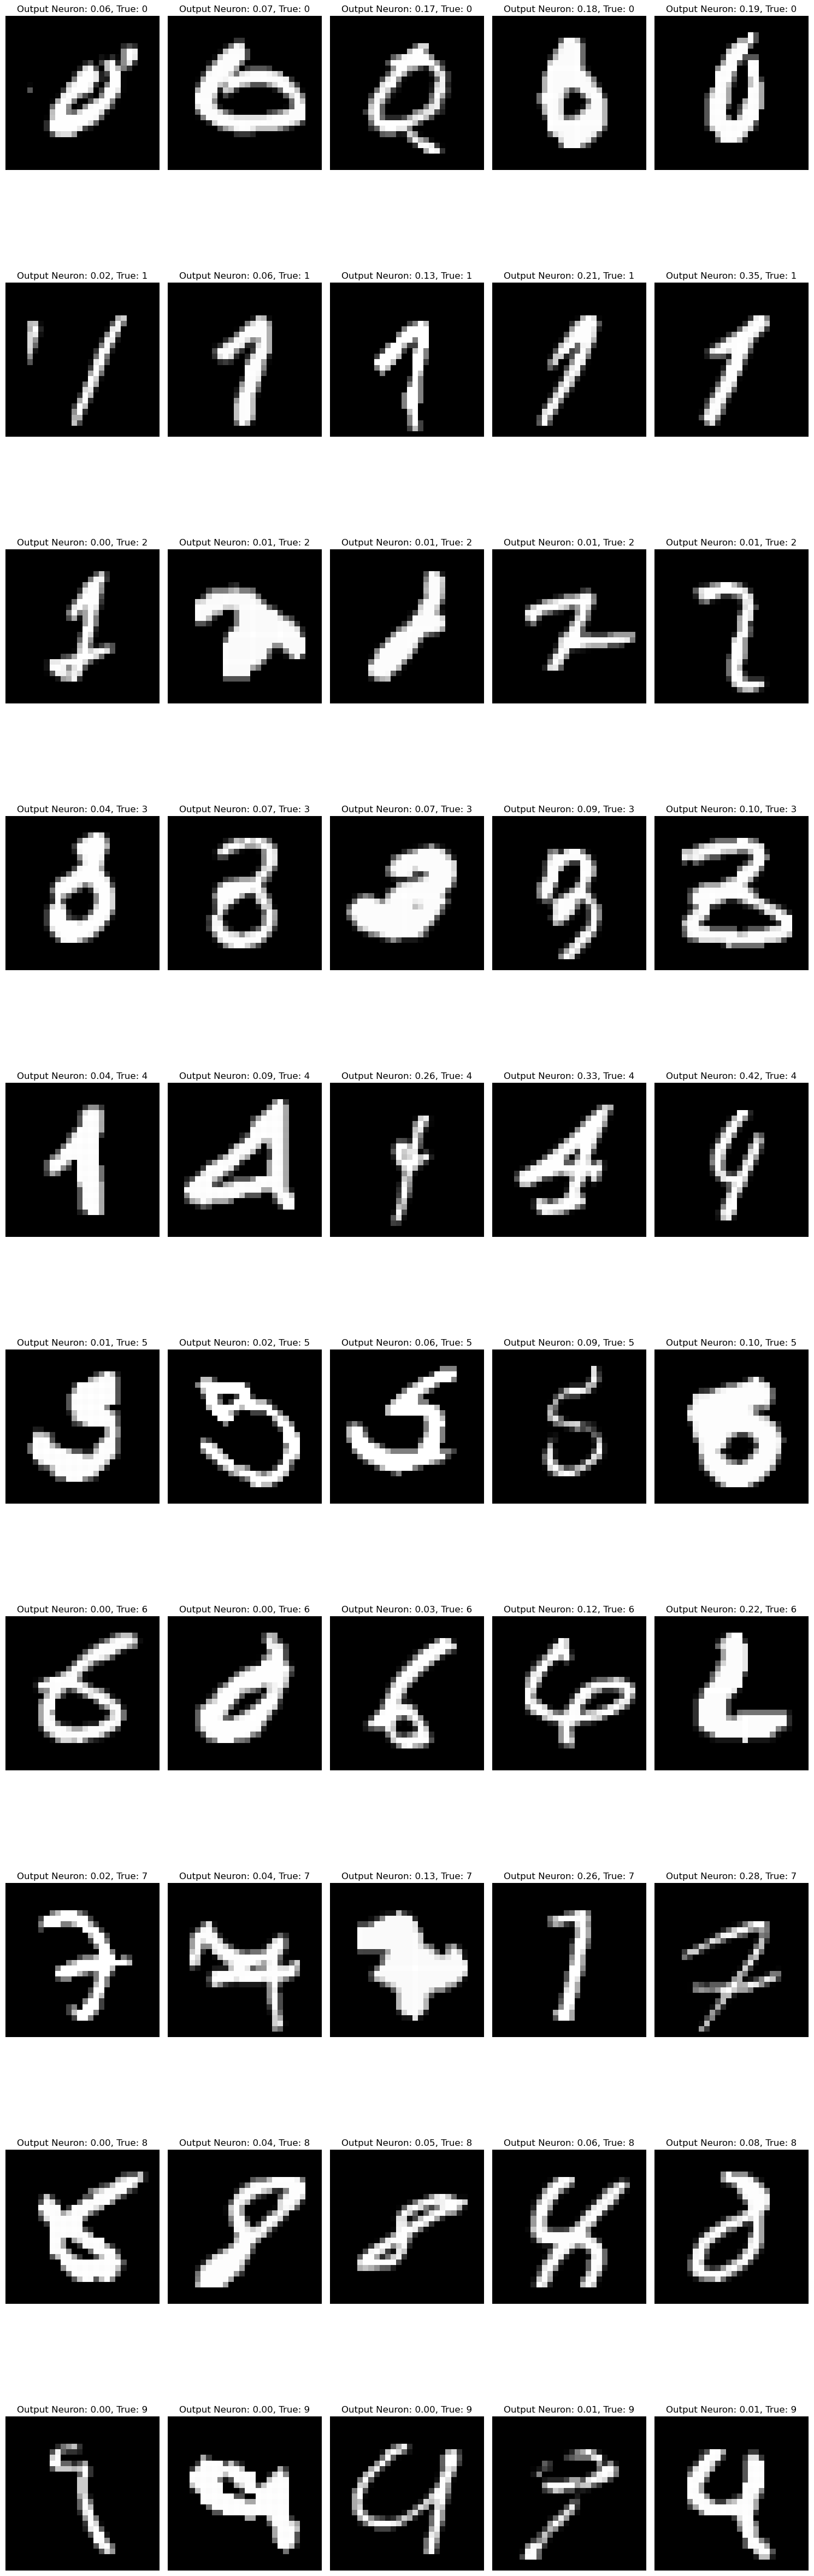

In [4]:
show_worst_image_predictions(model, data_module, n=5)

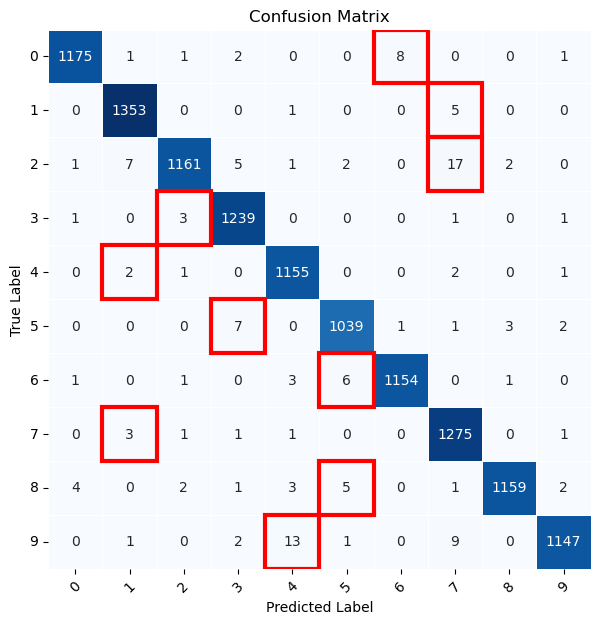

In [5]:
show_confusion_matrix(model, data_module)